In [1]:
# https://www.kaggle.com/code/mervenurduman/regressionmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


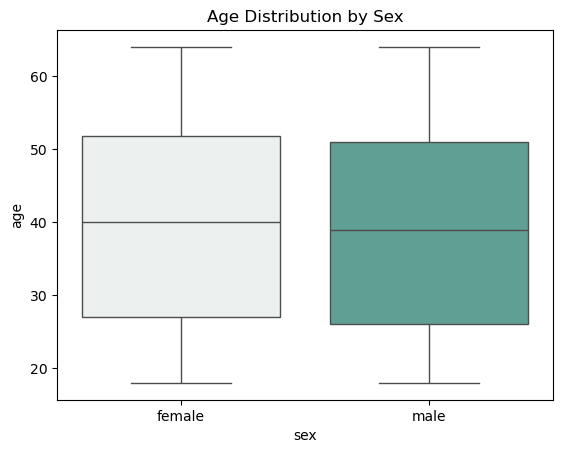

In [10]:
sns.boxplot(data=df, x='sex', y='age', palette="light:#5A9")
plt.title("Age Distribution by Sex")
plt.show()

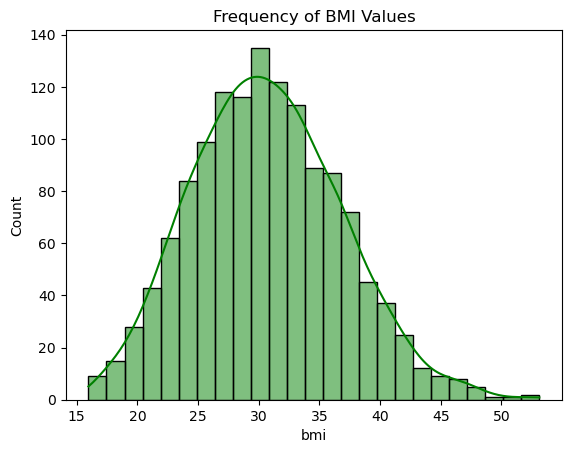

In [11]:
sns.histplot(data=df, x="bmi", kde=True, color="g")
plt.title("Frequency of BMI Values")
plt.show()

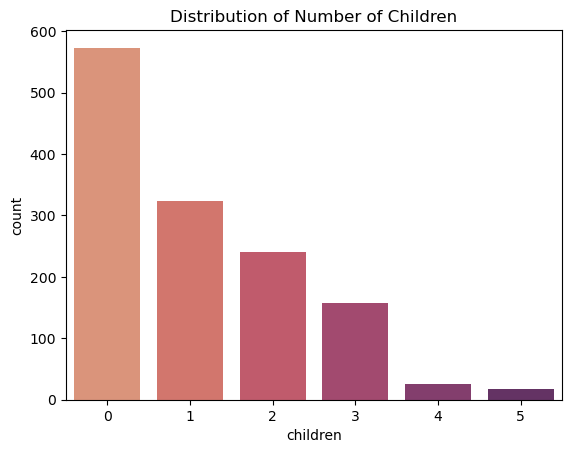

In [12]:
sns.countplot(data=df, x="children", palette="flare")
plt.title("Distribution of Number of Children")
plt.show()

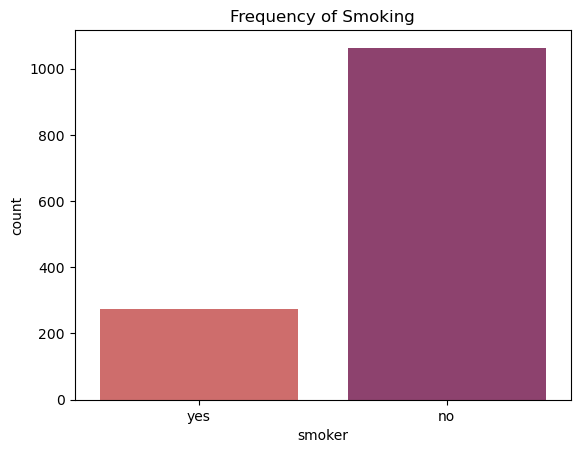

In [13]:
sns.countplot(data=df, x="smoker", palette="flare")
plt.title("Frequency of Smoking")
plt.show()

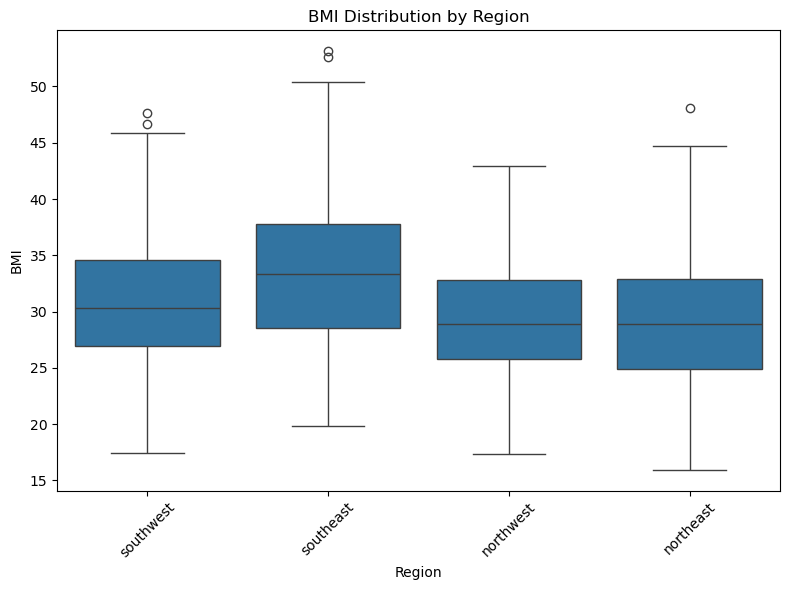

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='bmi', data=df)
plt.title('BMI Distribution by Region')
plt.ylabel('BMI')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

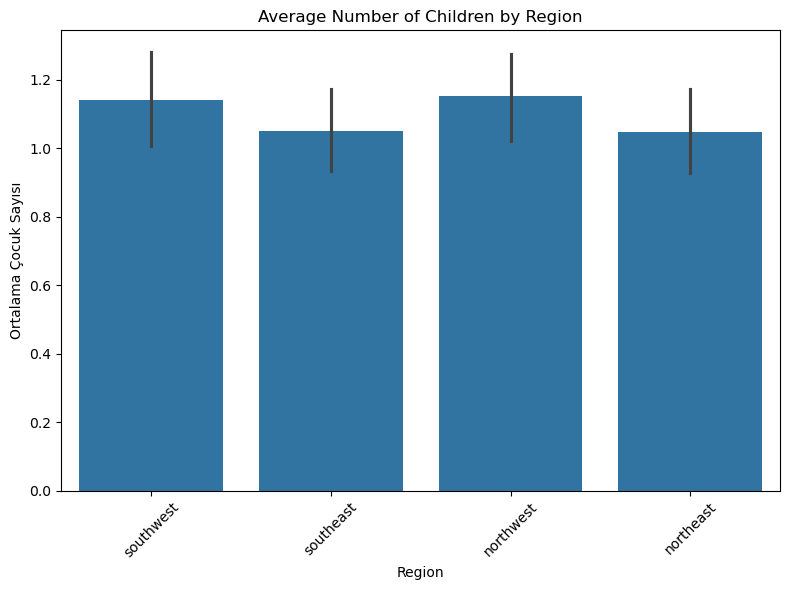

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='children', data=df, estimator='mean')
plt.title('Average Number of Children by Region')
plt.ylabel('Ortalama Çocuk Sayısı')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

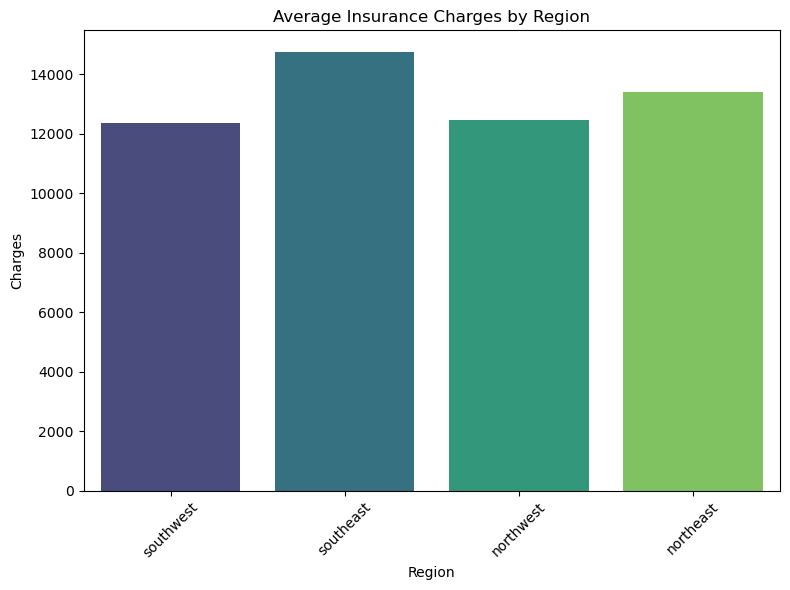

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='charges', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
categorical_columns = [col for col in df.columns if df[col].dtype == "O"]
for col in categorical_columns:
    print(df[col].value_counts())
    print("-" * 15)

sex
male      675
female    662
Name: count, dtype: int64
---------------
smoker
no     1063
yes     274
Name: count, dtype: int64
---------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
---------------


In [19]:
data = df.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
data["smoker"] = np.where(data["smoker"].str.contains("yes"), 1, 0)
data["sex"] = np.where(data["sex"] == "male", 0, 1)

In [22]:
data = pd.get_dummies(data,columns=['region'], drop_first=True, dtype=int)

In [23]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   int64  
 7   region_southeast  1337 non-null   int64  
 8   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 104.5 KB


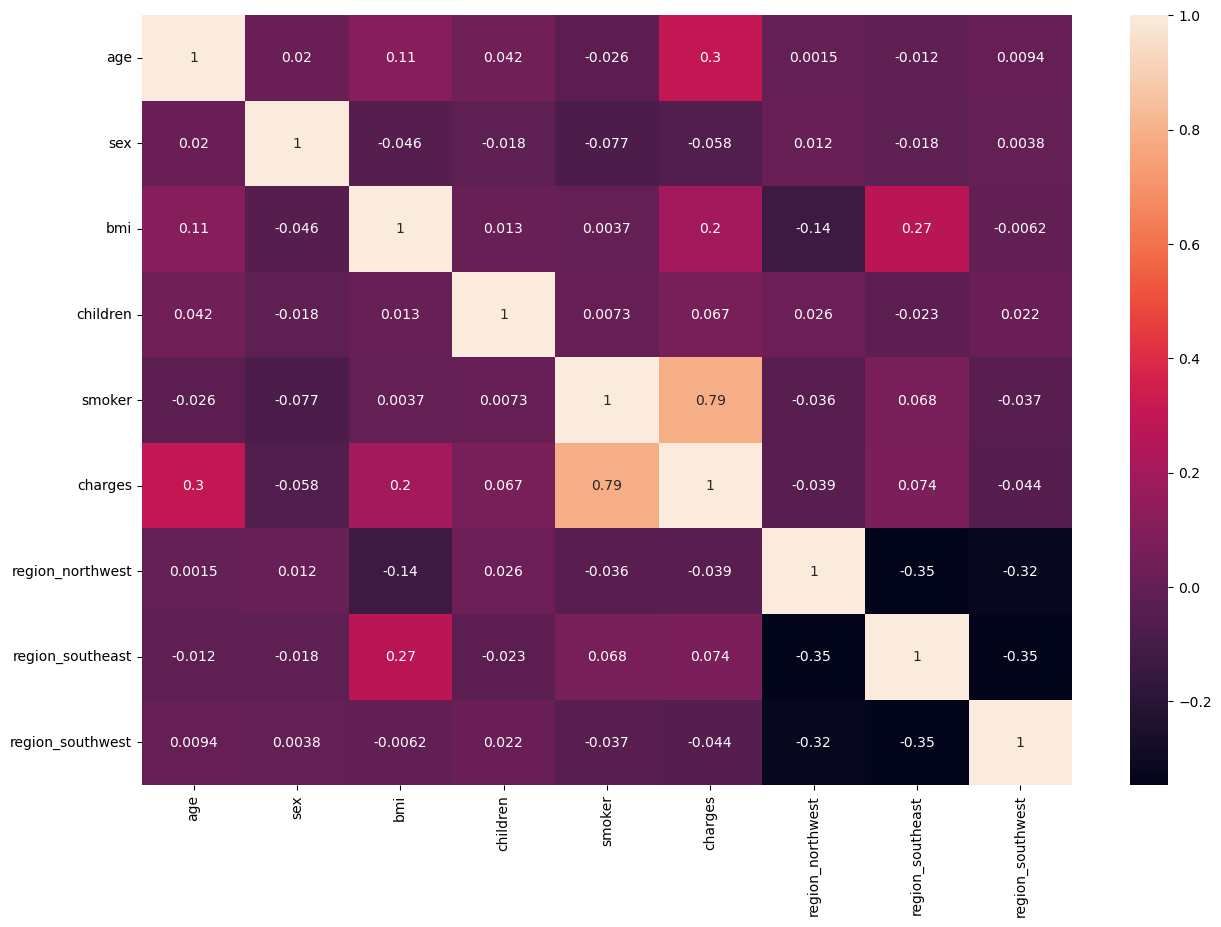

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Regression Models

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Independent & Dependent Features

In [29]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 8), (268, 8), (1069,), (268,))

In [32]:
# Scaling

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

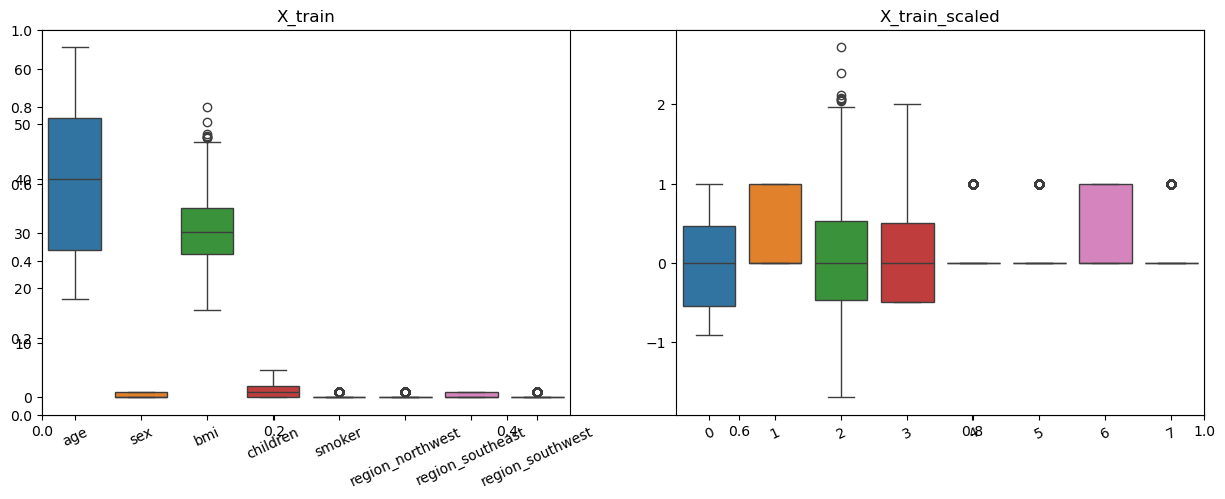

In [33]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.xticks(rotation=25)

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.xticks(rotation=25)
plt.show()

In [34]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RidgeCV': RidgeCV(cv=5),
    'Lasso': Lasso(),
    'LassoCV': LassoCV(cv=5),
    'ElasticNet': ElasticNet(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'SVR': SVR(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor()
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)

    print(name)
    print("Mean Absolute Error: ", mae)
    print("Mean Squared Error: ", mse)
    print("R2 Score: ", score)
    print("-" * 20)

LinearRegression
Mean Absolute Error:  4008.5235313259423
Mean Squared Error:  30870268.80013599
R2 Score:  0.7905321508756868
--------------------
Ridge
Mean Absolute Error:  4019.7626928863133
Mean Squared Error:  30894478.873337336
R2 Score:  0.7903678752746721
--------------------
RidgeCV
Mean Absolute Error:  4019.7626928863133
Mean Squared Error:  30894478.873337336
R2 Score:  0.7903678752746721
--------------------
Lasso
Mean Absolute Error:  4008.4180338132237
Mean Squared Error:  30868938.15226029
R2 Score:  0.7905411798851285
--------------------
LassoCV
Mean Absolute Error:  4010.844992503589
Mean Squared Error:  30874030.583676245
R2 Score:  0.7905066255810369
--------------------
ElasticNet
Mean Absolute Error:  7516.302533550318
Mean Squared Error:  94234771.56058168
R2 Score:  0.36057716117363103
--------------------
ElasticNetCV
Mean Absolute Error:  9066.755647632734
Mean Squared Error:  136867280.98552418
R2 Score:  0.07129752743181617
--------------------
SVR
Mean Ab

## HyperParameter Tuning

In [36]:
params = {
    'Ridge': {"alpha": [0.1, 1.0, 10.0, 100.0]},
    
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    
    'SVR':   {'C' : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.001],
              'kernel' : ["rbf", "linear"]},
    
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7, 9],
                            'weights': ['uniform', 'distance']},
    
    'DecisionTreeRegressor': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                              'splitter': ['best', 'random'],
                              'max_depth': [None, 5, 10, 20],
                              'max_features': ['sqrt', 'log2', None]}
}

In [37]:
best_models = {}

for name, model in models.items():
    if name in params:
        grid = GridSearchCV(model, params[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        
        best_models[name] = grid.best_estimator_
        print(f"{name} - Best Parameters: {grid.best_params_}")
        print(f"{name} - Best R2 Score: {grid.best_score_:.4f}")
        print("-" * 40)

Ridge - Best Parameters: {'alpha': 1.0}
Ridge - Best R2 Score: 0.7311
----------------------------------------
Lasso - Best Parameters: {'alpha': 1.0}
Lasso - Best R2 Score: 0.7311
----------------------------------------
SVR - Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVR - Best R2 Score: 0.6342
----------------------------------------
KNeighborsRegressor - Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
KNeighborsRegressor - Best R2 Score: 0.7566
----------------------------------------
DecisionTreeRegressor - Best Parameters: {'criterion': 'poisson', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
DecisionTreeRegressor - Best R2 Score: 0.8419
----------------------------------------


In [38]:
# Overfitting Evaluation

#  "Train and Test Data Predictions"
y_train_pred = best_models['DecisionTreeRegressor'].predict(X_train_scaled)
y_test_pred = best_models['DecisionTreeRegressor'].predict(X_test_scaled)

#  Scores on Training Data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Scores on Test Data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("DecisionTreeRegressor - Overfitting Check")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

DecisionTreeRegressor - Overfitting Check
Train R² Score: 0.8724
Test R² Score: 0.8894
Train MAE: 2504.31, Test MAE: 2356.08
Train MSE: 18666098.49, Test MSE: 16298860.10


## In Conclusion 

Multiple regression models were tested, and DecisionTreeRegressor showed the best performance after hyperparameter tuning with Grid Search. Overfitting was checked by comparing train and test metrics, confirming the model’s strong generalization.